In [1]:
import pandas as pd

# Load the dataset
file_path = 'employee_experience_survey_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to get familiar with the data
print(df.head())
# Check for missing values
print(df.isnull().sum())

# Basic info about the data
print(df.info())


# Descriptive statistics for Overall Engagement and Job Satisfaction
descriptive_stats = df[['Overall Engagement', 'Job Satisfaction']].describe()

# Show descriptive statistics
print(descriptive_stats)

# Mode for Overall Engagement and Job Satisfaction
mode_engagement = df['Overall Engagement'].mode()[0]
mode_satisfaction = df['Job Satisfaction'].mode()[0]

print(f"Mode of Overall Engagement: {mode_engagement}")
print(f"Mode of Job Satisfaction: {mode_satisfaction}")

              Name Age Bracket  Gender       Ethnicity           Job Title  \
0         John Doe       25-34  Female           Asian     Product Manager   
1       Jane Smith       18-24  Female  Middle Eastern  Operations Manager   
2     Carlos Reyes       45-54  Female          Indian         UX Designer   
3      Emily Zhang       35-44    Male       Caucasian         UX Designer   
4  Michael Johnson       18-24  Female       Caucasian         UX Designer   

            Department Date Survey Completed Job Satisfaction  \
0  Product Development            2024-10-05         Disagree   
1                Sales            2024-10-07            Agree   
2           Consulting            2024-10-08          Neutral   
3                   HR            2024-10-07          Neutral   
4  Product Development            2024-10-07            Agree   

   Work-Life Balance Management Support Team Collaboration  Workload Fairness  \
0     Strongly Agree            Neutral            Neutral 

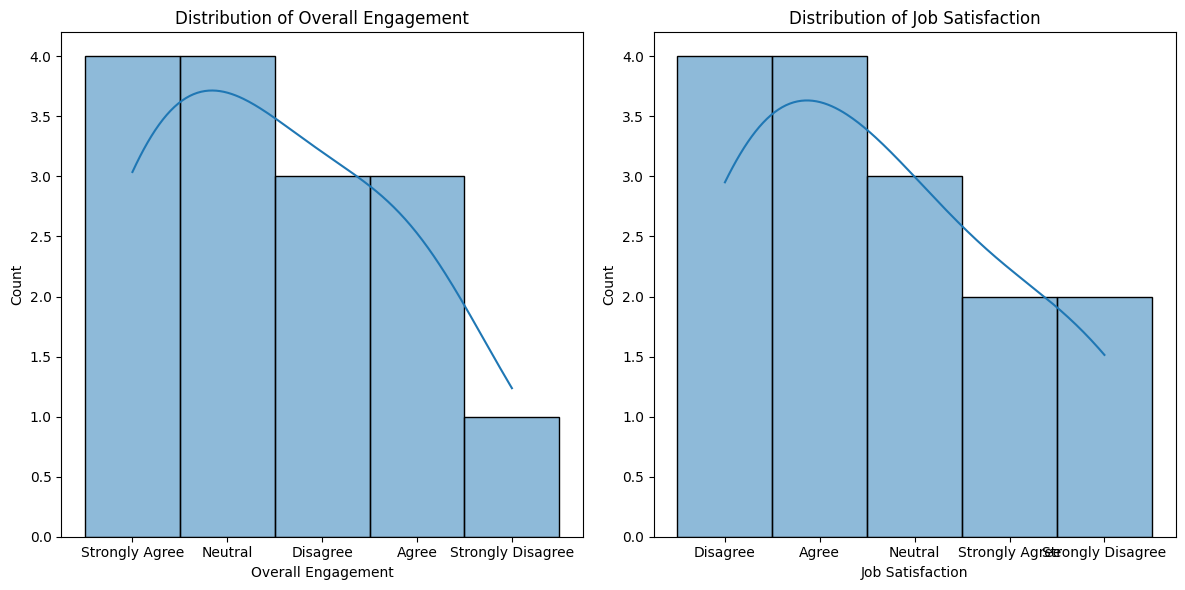

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for Overall Engagement and Job Satisfaction
plt.figure(figsize=(12, 6))

# Histogram for Overall Engagement
plt.subplot(1, 2, 1)
sns.histplot(df['Overall Engagement'], bins=5, kde=True)
plt.title('Distribution of Overall Engagement')

# Histogram for Job Satisfaction
plt.subplot(1, 2, 2)
sns.histplot(df['Job Satisfaction'], bins=5, kde=True)
plt.title('Distribution of Job Satisfaction')

plt.tight_layout()
plt.show()

In [4]:
# Define a dictionary to map Likert scale responses to numeric values
likert_scale_map = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

# List of columns that are on a Likert scale
likert_columns = [
    'Job Satisfaction', 'Work-Life Balance', 'Management Support', 'Team Collaboration',
    'Workload Fairness', 'Career Development Opportunities', 'Workplace Inclusivity',
    'Company Communication', 'Compensation Satisfaction', 'Job Security', 'Overall Engagement'
]

# Apply the mapping to all Likert scale columns
for col in likert_columns:
    df[col] = df[col].map(likert_scale_map)

# Verify the conversion by checking the data types
print(df[likert_columns].dtypes)

# Display the first few rows to confirm the conversion worked correctly
print(df.head())


Job Satisfaction                    int64
Work-Life Balance                   int64
Management Support                  int64
Team Collaboration                  int64
Workload Fairness                   int64
Career Development Opportunities    int64
Workplace Inclusivity               int64
Company Communication               int64
Compensation Satisfaction           int64
Job Security                        int64
Overall Engagement                  int64
dtype: object
              Name Age Bracket  Gender       Ethnicity           Job Title  \
0         John Doe       25-34  Female           Asian     Product Manager   
1       Jane Smith       18-24  Female  Middle Eastern  Operations Manager   
2     Carlos Reyes       45-54  Female          Indian         UX Designer   
3      Emily Zhang       35-44    Male       Caucasian         UX Designer   
4  Michael Johnson       18-24  Female       Caucasian         UX Designer   

            Department Date Survey Completed  Job Satis

In [5]:
# Group by Age Bracket and calculate mean of Job Satisfaction and Overall Engagement
age_group_stats = df.groupby('Age Bracket')[['Job Satisfaction', 'Overall Engagement']].mean()
print(age_group_stats)

# Group by Gender and calculate mean of Job Satisfaction and Overall Engagement
gender_group_stats = df.groupby('Gender')[['Job Satisfaction', 'Overall Engagement']].mean()
print(gender_group_stats)

# Group by Department and calculate mean of Job Satisfaction and Overall Engagement
department_group_stats = df.groupby('Department')[['Job Satisfaction', 'Overall Engagement']].mean()
print(department_group_stats)


             Job Satisfaction  Overall Engagement
Age Bracket                                      
18-24                3.428571            3.428571
25-34                3.000000            3.666667
35-44                2.000000            2.500000
45-54                2.666667            3.666667
        Job Satisfaction  Overall Engagement
Gender                                      
Female          2.777778            3.666667
Male            3.333333            3.000000
                     Job Satisfaction  Overall Engagement
Department                                               
Consulting                   3.000000            4.000000
Design                       5.000000            1.000000
Finance                      4.000000            5.000000
HR                           4.000000            3.500000
IT                           1.000000            2.000000
Operations                   2.000000            3.000000
Product Development          2.666667            3.66666

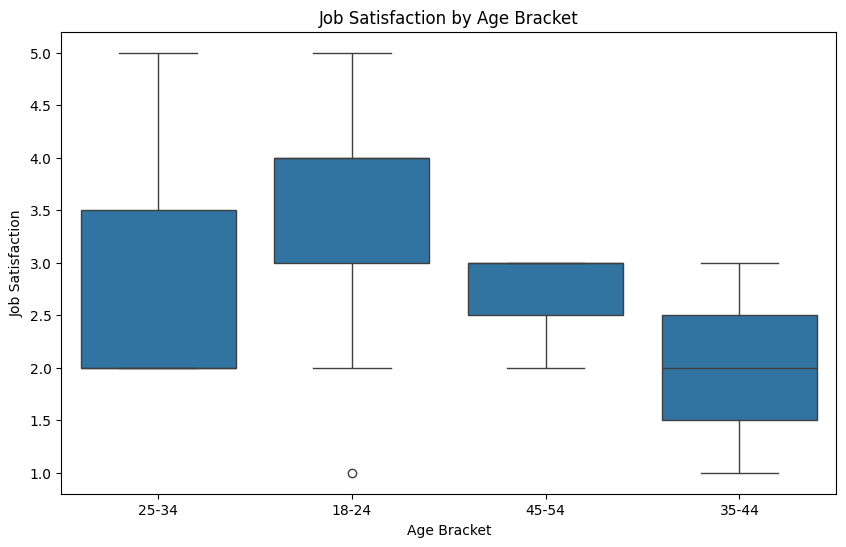

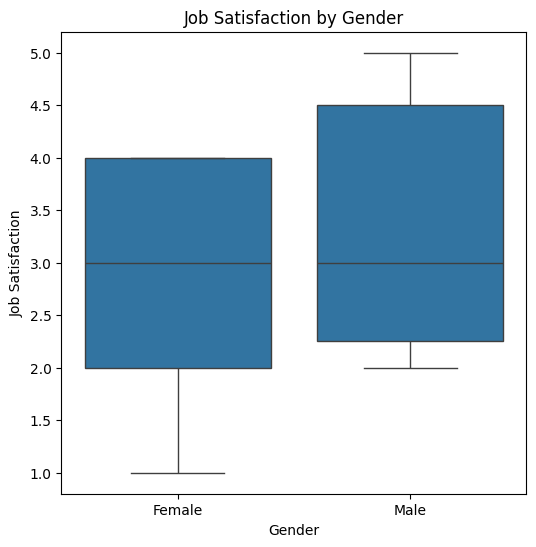

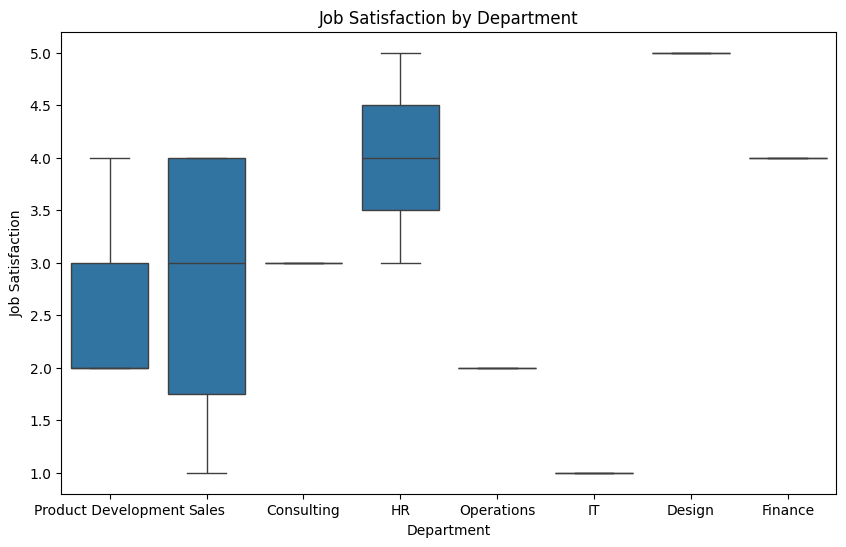

In [6]:
# Boxplot of Job Satisfaction by Age Bracket
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Bracket', y='Job Satisfaction', data=df)
plt.title('Job Satisfaction by Age Bracket')
plt.show()

# Boxplot of Job Satisfaction by Gender
plt.figure(figsize=(6, 6))
sns.boxplot(x='Gender', y='Job Satisfaction', data=df)
plt.title('Job Satisfaction by Gender')
plt.show()

# Boxplot of Job Satisfaction by Department
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Job Satisfaction', data=df)
plt.title('Job Satisfaction by Department')
plt.show()


In [7]:
from scipy.stats import ttest_ind

# Filter data for the two departments (IT and HR)
it_satisfaction = df[df['Department'] == 'IT']['Job Satisfaction']
hr_satisfaction = df[df['Department'] == 'HR']['Job Satisfaction']

# Perform t-test
t_stat, p_value = ttest_ind(it_satisfaction, hr_satisfaction)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if we can reject the null hypothesis (if p-value < 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Job Satisfaction between IT and HR.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Job Satisfaction between IT and HR.")


T-statistic: -1.7320508075688774
P-value: 0.33333333333333326
Fail to reject the null hypothesis: There is no significant difference in Job Satisfaction between IT and HR.


In [8]:
from scipy.stats import pearsonr

# Calculate Pearson correlation between Work-Life Balance and Overall Engagement
corr_coeff, p_value_corr = pearsonr(df['Work-Life Balance'], df['Overall Engagement'])

print(f"Pearson Correlation Coefficient: {corr_coeff}")
print(f"P-value: {p_value_corr}")

# Interpret the correlation
if abs(corr_coeff) > 0.5:
    print("There is a strong correlation between Work-Life Balance and Overall Engagement.")
else:
    print("There is a weak or no correlation between Work-Life Balance and Overall Engagement.")


Pearson Correlation Coefficient: -0.361040820409166
P-value: 0.18612659993280437
There is a weak or no correlation between Work-Life Balance and Overall Engagement.
